In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sys

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [7]:
sub_df = df.iloc[0:670]
sub_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
665,1,112,80,45,132,34.8,0.217,24,0
666,4,145,82,18,0,32.5,0.235,70,1
667,10,111,70,27,0,27.5,0.141,40,1
668,6,98,58,33,190,34.0,0.430,43,0


In [16]:
sub_df['Outcome'].value_counts()

0    439
1    231
Name: Outcome, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(sub_df.drop(columns=['Outcome']), sub_df['Outcome'], test_size=0.2, random_state=2020, shuffle=False)

In [9]:
# model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20, max_leaf_nodes=30, random_state=2020)
model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10, max_leaf_nodes=10, random_state=2020)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10,
                       min_samples_leaf=10, random_state=2020)

In [10]:
model.get_depth()

6

In [11]:
y_pred = model.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

0.8208955223880597

In [13]:
f1_score(y_test, y_pred, average='macro')

0.775982167734745

In [14]:
model.predict(df.iloc[[712, 749, 703, 740]].drop(columns=['Outcome']))

array([0, 1, 0, 1])

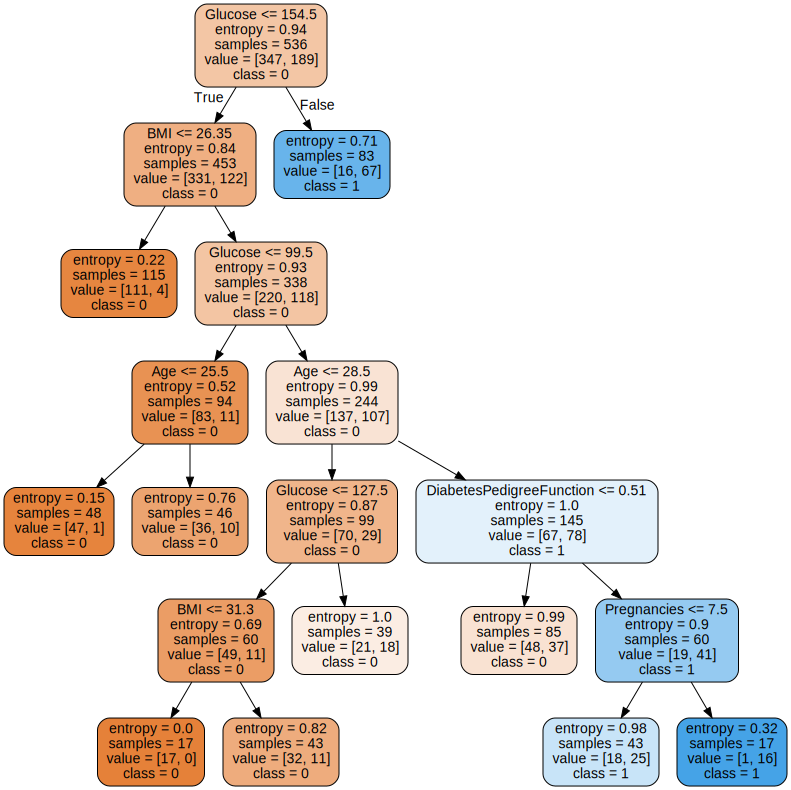

In [15]:
columns = list(df.drop(columns=['Outcome']).columns)
export_graphviz(model, out_file='tree.dot', 
                feature_names=columns,
                class_names=['0', '1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

In [ ]:
model.feature_importances_

array([0.        , 0.43420288, 0.04177339, 0.        , 0.07399799,
       0.27780451, 0.07765172, 0.09456951])

In [ ]:
model.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)